# **Práctica final: Machine Learning: Modelos Supervisados**
### Enrique Andreu Puech, Iñigo Pérez Villacañas y Álvaro Payo Bastante

#Importar librerías y DataFrame

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve,recall_score,precision_score,confusion_matrix
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib
import seaborn as sns
import itertools
import plotly.express as px
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.ensemble import BaggingClassifier
import multiprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
import multiprocessing
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 

warnings.filterwarnings('once')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/NCDB_1999_to_2014.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Objetivos

*   ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?
*   ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son menos propensos a tener accidentes (descuento en prima)?


*  ¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?

*   Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? ¿Si se va a necesitar tratamiento médico o no? Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas.
*   Libertad para generar análisis de valor y nuevas ideas. Se debe atacar mínimo un modelo (estimar si habrá fallecidos o no). Hecho esto, se puede plantear de forma opcional otros alcances (libertad para plantear opciones). 

*   Plus: complementar con datos abiertos de clima (aunque Canadá es muy grande) y de otra tipología, ¿hay algún tipo de relación con temperaturas medias, precipitación media del día/mes, nieve...? ¿a más días festivos o de vacaciones, más accidentes? etc.





# **1. Análisis de los datos y tratamiento de la variable objetivo**

In [4]:
df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,3,03,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,6,18,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,6,18,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,U,UU,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,U,18,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,4,18,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,Q,18,1,22,UUUU,01,M,67,12,3,01,U


Vemos la composición del dataframe, que cuenta con 22 variables y 5.860.405 registros. Vamos a cambiar el nombre de las variables para que sean más fácil de identificar, y vamos a eliminar los registros duplicados y las variables que no nos sirven.

Las variables que eliminaremos serán passenger_id, y vehicle_id, que son variables identificativas; y la variable passenger_fatality, que nos indica si en el accidente hay lesión, muerte, o ninguna de las dos. La eliminamos ya que contamos con la variable "fatality", que ya nos indica si hay o no hay muertes en el accidente.

In [5]:
new_names = ["year", "month", "weekday", "hour", "fatality", "vehicles_involved", "collision_config", "roadway_config", "weather",
"surface_state", "road_alignment", "traffic", "vehicle_id", "vehicle_type", "vehicle_year", "passenger_id", "passenger_sex",
"passenger_age", "passenger_position", "passenger_fatality", "passenger_safety", "passenger_type"]

print(len(new_names) == len(df.columns))
df.columns = new_names

print(df.shape)
df_fatality = df.drop_duplicates().drop(['passenger_id','vehicle_id','passenger_fatality'], axis=1)
df_fatality.shape

True
(5860405, 22)


(5855336, 19)

In [6]:
df_fatality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5855336 entries, 0 to 5860404
Data columns (total 19 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   year                int64 
 1   month               object
 2   weekday             object
 3   hour                object
 4   fatality            int64 
 5   vehicles_involved   object
 6   collision_config    object
 7   roadway_config      object
 8   weather             object
 9   surface_state       object
 10  road_alignment      object
 11  traffic             object
 12  vehicle_type        object
 13  vehicle_year        object
 14  passenger_sex       object
 15  passenger_age       object
 16  passenger_position  object
 17  passenger_safety    object
 18  passenger_type      object
dtypes: int64(2), object(17)
memory usage: 893.5+ MB


## *1.1. Análisis de la variable objetivo*

In [7]:
df_fatality['fatality'].unique()

array([2, 1])

La variable objetivo está compuesta por 1 y 2. El 1 nos indica que en el accidente han tenido lugar uno o más fallecimientos, y el 2 que no existen fallecimientos en el accidente.

Vamos a cambiar los valores por 1 y 0. De esta manera, 0 significará que hay fallecimiento en el accidente, y 1 que no lo hay. 

Vemos una tabla simple que nos indica la proporción de fallecimientos en los accidentes, junto con un gráfico. Estos nos indican que en más del 98% de accidentes registrados no fallecen pasajeros. Posteriormente, se balanceará la variable objetivo para que la aplicación de algoritmos sea más adecuada.

In [8]:
df_fatality.fatality.replace({2:1, 1:0}, inplace=True)

df_fatality_count = pd.DataFrame(df_fatality.groupby(['fatality'])['fatality'].count().rename('Count'))
df_fatality_count['Percentage'] = df_fatality_count['Count']/df_fatality_count['Count'].sum()
df_fatality_count = df_fatality_count.sort_values(by = "Count", ascending=False).reset_index()
df_fatality_count

,fatality,Count,Percentage
0,1,5756720,0.983158
1,0,98616,0.016842


In [9]:
fatality_per = df['fatality'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
fatality_count = df['fatality'].value_counts().reset_index()
fatality_merge= pd.merge(fatality_per, fatality_count, on=['index'], how='inner')
fig = px.histogram(fatality_merge, x="index", y=['percent'], labels={'index':'fatality'})
fig.show(figsize = (8,2))

# **2. Transformación de variables**

## *2.1. Reemplazo letras por NA's* 

Dentro del conjunto de datos, podemos encontrarnos con los siguientes valores en cada columna.

U: Datos estrictamente desconocidos.

N: La variable no aplica al registro completo.

X: La jurisdicción no proporciona este dato.

Q: La elección es distinta de los valores anteriores.

Vamos a tratar estos valores como si fuesen NA's, a excepción de la letra Q, que en lugar de transformarla en NA's, la cambiaremos por ceros, ya que las Q cumplen la función de 'Otro' en el dataset.


In [10]:
#Reemplazamos las Us, Xs y Ns por NAS.
df_fatality = df_fatality.replace({"U": np.nan, "UU": np.nan, "UUUU": np.nan, "X": np.nan, "XX": np.nan, "XXXX": np.nan, "N": np.nan, "NN": np.nan, "NNNN": np.nan})
#Reemplazamos las Qs por ceros.
df_fatality = df_fatality.replace({"Q": 0, "QQ": 0, "QQQQ": 0})

Antes de la transformación, el dataset contaba tan solo con tres NA's. Ahora, vamos a ver la distribución de NA's por filas y por columnas.

In [11]:
#Distribución de los NA's por columnas
pd_series_null_columns = df_fatality.isnull().sum().sort_values(ascending=False)
pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_por_columnas'])     
pd_null_columnas['porcentaje_nulos_por_columnas'] = pd_null_columnas['nulos_por_columnas']/df_fatality.shape[0]
pd_null_columnas

,nulos_por_columnas,porcentaje_nulos_por_columnas
passenger_safety,1185908,0.202535
vehicle_year,583178,0.099598
roadway_config,504547,0.086169
road_alignment,434626,0.074227
passenger_age,394235,0.067329
vehicle_type,257271,0.043938
passenger_sex,249131,0.042548
traffic,223451,0.038162
collision_config,178785,0.030534
passenger_type,175455,0.029965


In [12]:
#Distribución de los NA's por filas
pd_series_null_rows = df_fatality.isnull().sum(axis=1).sort_values(ascending=False)
pd_null_rows = pd.DataFrame(pd_series_null_rows, columns=['nulos_por_filas'])  
pd_null_rows['porcentaje_nulos_por_filas']= pd_null_rows['nulos_por_filas']/df_fatality.shape[1]
pd_null_rows

,nulos_por_filas,porcentaje_nulos_por_filas
5245712,16,0.842105
5245711,16,0.842105
4598129,15,0.789474
3226046,15,0.789474
4598126,15,0.789474
...,...,...
1687767,0,0.000000
3337075,0,0.000000
1687766,0,0.000000
1687765,0,0.000000


## *2.2. Transformación de variables a numéricas*

Hemos visto previamente que todas las variables eran tipo object, a excepción de la variable "year" y la variable "fatality", que son tipo integer.

Vamos a pasar todas las variables a tipo numérico, para después dividirlo en train y test y aplicar algoritmos de clasificación.

In [13]:
df_fatality.passenger_sex.replace({"M":1, "F":0}, inplace=True)

for column in df_fatality.columns:
  df_fatality[column] = pd.to_numeric(df_fatality[column], errors = 'ignore', downcast= 'integer')

In [14]:
df_fatality.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5855336 entries, 0 to 5860404
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   year                int16  
 1   month               float64
 2   weekday             float64
 3   hour                float64
 4   fatality            int8   
 5   vehicles_involved   float64
 6   collision_config    float64
 7   roadway_config      float64
 8   weather             float64
 9   surface_state       float64
 10  road_alignment      float64
 11  traffic             float64
 12  vehicle_type        float64
 13  vehicle_year        float64
 14  passenger_sex       float64
 15  passenger_age       float64
 16  passenger_position  float64
 17  passenger_safety    float64
 18  passenger_type      float64
dtypes: float64(17), int16(1), int8(1)
memory usage: 820.9 MB


# **3. Análisis exploratorio**

In [15]:
df_eda = df_fatality.dropna()

## *3.1 Serie temporal accidentes*

In [16]:
fatality_0 = pd.DataFrame(df_eda.loc[df_eda.fatality == 0].groupby('year')['fatality'].count())
fatality_1 = pd.DataFrame(df_eda.loc[df_eda.fatality == 1].groupby('year')['fatality'].count())
fatality_ts = pd.concat([fatality_0, fatality_1.reindex(fatality_0.index)], axis=1)
fatality_ts.columns = ['fatal_accidents', 'non_fatal_accidents']
fatality_ts = fatality_ts.rename_axis('year').reset_index()

fatality_ts

,year,fatal_accidents,non_fatal_accidents
0,1999,4638,237023
1,2000,4151,254578
2,2001,4378,247063
3,2002,4581,254799
4,2003,4477,248006
5,2004,4597,238365
6,2005,4587,235974
7,2006,4527,228170
8,2007,4093,221310
9,2008,3468,203925


Creamos un dataframe en el que se recoge el número de accidentes de cada año, distinguiendo entre accidentes mortales y no mortales. 

En el gráfico que vemos a continuación, se nos muestra la evolución de los accidentes, donde podemos ver que a lo largo de los años, los accidentes mortales se reducen a casi la mitad en 15 años. Además, vemos que en esos 15 años, hay una diferencia de más de 50.000 accidentes entre 1999 y 2014.  

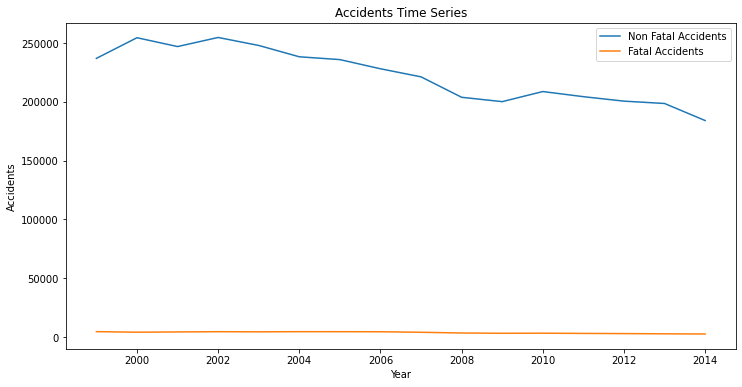

In [17]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'year', y = 'non_fatal_accidents', data = fatality_ts)
sns.lineplot(x = 'year', y = 'fatal_accidents', data = fatality_ts)
plt.title("Accidents Time Series")
plt.xlabel("Year")
plt.ylabel("Accidents")
plt.legend(labels=["Non Fatal Accidents","Fatal Accidents"])


## *3.2 Frecuencia de accidentes por tipo de vehículo*

In [18]:
#¿Qué tipos de vehículos son más propensos a sufrir accidentes?
vehicle_type = df_eda.groupby(['vehicle_type'])['vehicle_type'].count()
v_acc = pd.DataFrame(vehicle_type)
v_acc = v_acc.set_axis(['count'], axis=1, inplace=False)
v_acc = v_acc.reset_index(level=0)
v_acc['percentage'] = v_acc['count']/sum(v_acc['count'])
v_acc = v_acc.sort_values(by=['percentage'], ascending=False)

v_acc

,vehicle_type,count,percentage
0,1.0,3272478,0.902083
2,6.0,112267,0.030947
8,14.0,58283,0.016066
3,7.0,46537,0.012828
1,5.0,44562,0.012284
4,8.0,41346,0.011397
7,11.0,31169,0.008592
5,9.0,13393,0.003692
9,17.0,3038,0.000837
10,18.0,1699,0.000468


En el dataframe anterior vemos la cantidad de accidentes en función del tipo de vehículo, representados en un gráfico de barras a continuación. Vemos que el 90% de los accidentes llevan el número 1, que se corresponde con coches de pasajeros, furgonetas de pasajeros, o pick-ups.

En segundo lugar podemos ver que el siguiente vehículo con más accidentes es el número 6, que se corresponde con otros camiones y furgonetas, y se encuentran en el 3% de los accidentes; seguidos de las motocicletas y motocicletas de velocidad limitada (número 14), que se encuentran en un 1% de los accidentes, al igual que vehículos como las furgonetas de transporte de materiales, los camiones más pesados, y tractores. 

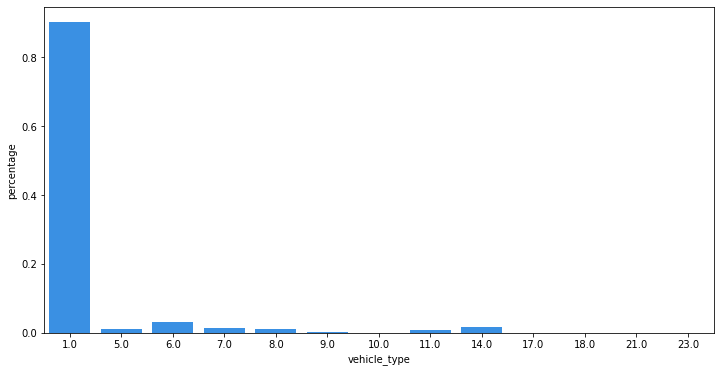

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(data = v_acc, x = 'vehicle_type', y = 'percentage', color = 'dodgerblue')

In [20]:
df_eda['vehicle_age'] = df_eda['year'] - df_eda['vehicle_year'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## *3.3 Accidentes por meses*

In [21]:
month_fatality = pd.DataFrame(df_eda.loc[df_eda.fatality == 0].groupby(['month'])['fatality'].count())
month_fatality = month_fatality.reset_index()
month_fatality.columns = ['month', 'total_accidents']
month_fatality

,month,total_accidents
0,1.0,4735
1,2.0,3911
2,3.0,4190
3,4.0,3972
4,5.0,4807
5,6.0,5443
6,7.0,6446
7,8.0,6204
8,9.0,5612
9,10.0,5446


In [82]:
month_fatality['total_accidents'].mean()

5128.583333333333

En el siguiente gráfico vemos el número de accidentes por mes, y podemos ver claramente que estos se incrementan a partir del mes de mayo, pasando de menos de 5000 accidentes en mayo, a más de 6000 en los meses de julio y agosto.

Podemos decir que esto se debe a que en los meses de verano tienen lugar más viajes, al igual que en el mes de diciembre, correspondiéndose con las vacaciones de Navidad. Todos estos meses superan notablemente la media.

Text(0, 0.5, 'Accidents')

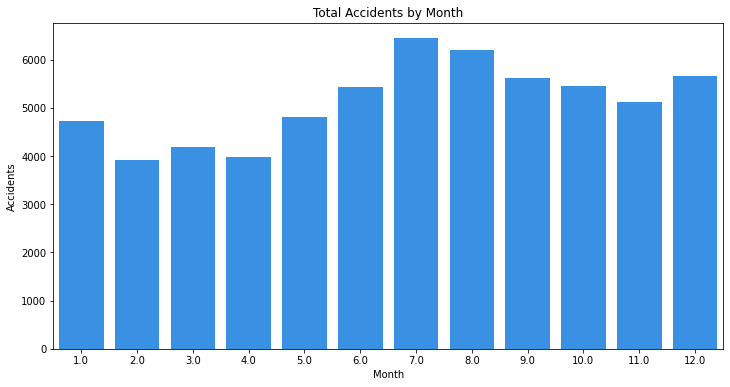

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x = month_fatality['month'], y = month_fatality['total_accidents'], color = 'dodgerblue')
plt.title("Total Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Accidents")

##*3.4 Accidentes por día de la semana*

In [23]:
weekday_fatality = pd.DataFrame(df_eda.groupby(['weekday'])['fatality'].count())
weekday_fatality = weekday_fatality.reset_index()
weekday_fatality.columns = ['weekday', 'total_accidents']
weekday_fatality

,weekday,total_accidents
0,1.0,478078
1,2.0,500853
2,3.0,503622
3,4.0,532203
4,5.0,616935
5,6.0,547386
6,7.0,448613


Respecto a los accidentes según los días de la semana, podemos ver que los días en los que más accidentes se producen son el viernes y el sábado. Esto se debe a que son los días en los que hay una mayor movilidad en las carreteras, principalmente porque es cuando las personas hacen planes relacionados con su tiempo libre.

Text(0, 0.5, 'Accidents')

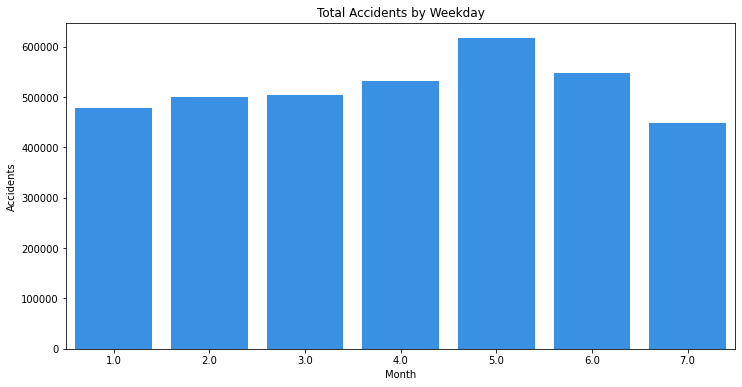

In [24]:
plt.figure(figsize = (12,6))
sns.barplot(x = weekday_fatality['weekday'], y = weekday_fatality['total_accidents'], color = 'dodgerblue')
plt.title("Total Accidents by Weekday")
plt.xlabel("Month")
plt.ylabel("Accidents")

In [25]:
df_eda.groupby(['fatality'])['fatality'].count()

fatality
0      61543
1    3566147
Name: fatality, dtype: int64

## *3.5 Accidentes según clima*

In [26]:
weather_fatality = pd.DataFrame(df_eda.groupby(['weather'])['fatality'].count())
weather_fatality = weather_fatality.reset_index()
weather_fatality.columns = ['weather', 'total_accidents']
weather_fatality

,weather,total_accidents
0,0.0,7476
1,1.0,2542398
2,2.0,351693
3,3.0,401504
4,4.0,238792
5,5.0,20051
6,6.0,55622
7,7.0,10154


Respecto al clima, los días en los que más accidentes se producen, se tratan de los días soleados. Esto nos muestra que no existe ninguna dependencia entre la presencia de precipitaciones en forma de nieve o lluvia y el número de accidentes, al igual que tampoco existe con los días con niebla o viento fuerte.

Text(0, 0.5, 'Total Accidents')

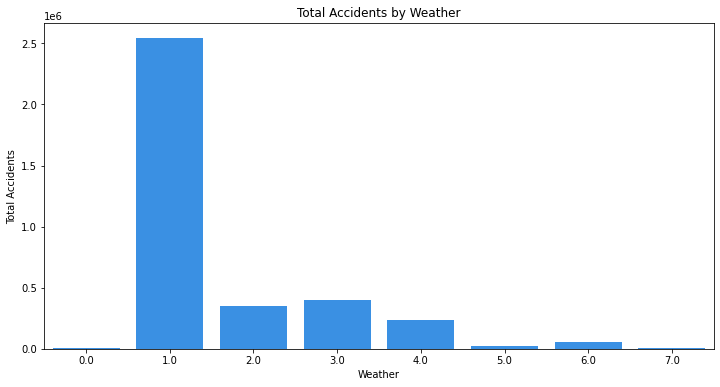

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(x = weather_fatality['weather'], y = weather_fatality['total_accidents'], color = 'dodgerblue')
plt.title("Total Accidents by Weather")
plt.xlabel("Weather")
plt.ylabel("Total Accidents")

## *3.6 Accidentes por sexo*

In [28]:
sex_fatality = pd.DataFrame(df_eda.groupby('passenger_sex')['fatality'].count())
sex_fatality = sex_fatality.reset_index()
sex_fatality.columns = ['sex', 'total_accidents']
sex_fatality

,sex,total_accidents
0,0.0,1667920
1,1.0,1959770


Respecto a la distribución de los accidentes por sexo, son los hombres (1), los que más accidentes tienen, superando en casi 300.000 ocasiones a las mujeres.

Text(0, 0.5, 'Total Accidents')

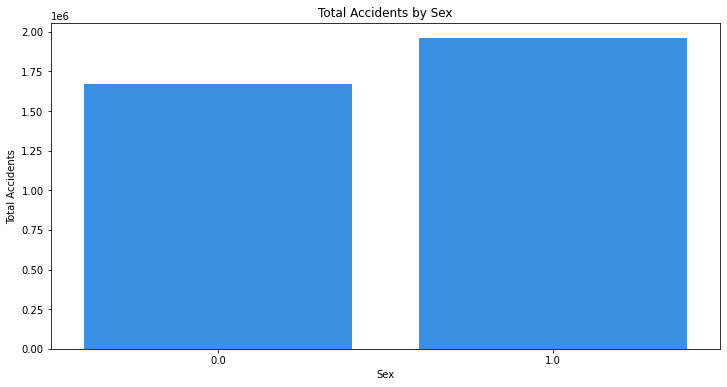

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(x = sex_fatality['sex'], y = sex_fatality['total_accidents'], color = 'dodgerblue')
plt.title("Total Accidents by Sex")
plt.xlabel("Sex")
plt.ylabel("Total Accidents")

## *3.7 Accidentes por edad*

In [79]:
age_fatality = pd.DataFrame(df_eda.groupby('passenger_age')['fatality'].count())
age_fatality = age_fatality.reset_index()
age_fatality.columns = ['age', 'total_accidents']
age_fatality

,age,total_accidents
0,1.0,31671
1,2.0,19678
2,3.0,19780
3,4.0,20064
4,5.0,19904
5,6.0,18738
6,7.0,18798
7,8.0,18995
8,9.0,18995
9,10.0,19651


Realizamos una agrupación por edad y un conteo de los accidentes. Como se puede apreciar en el siguiente gráfico, los conductores que experimentan accidentes con mayor frecuencia son aquellos que acaban de obtener su licencia de conducir, ya que en Canadá la edad mínima requerida son 16 años.
Entre los 30 y los 45 años la frecuencia de los accidentes se mantiene relativamente estable y posteriormente se reduce progresivamente.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 <a list of 99 Text major ticklabel objects>)

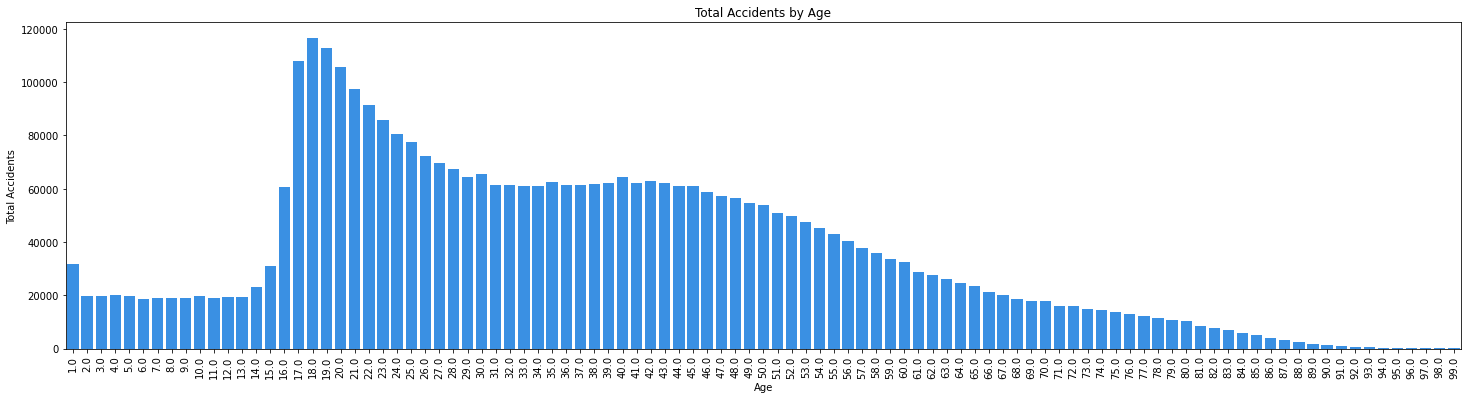

In [80]:
plt.figure(figsize = (25,6))
sns.barplot(x = age_fatality['age'], y = age_fatality['total_accidents'], color = 'dodgerblue')
plt.title("Total Accidents by Age")
plt.xlabel("Age")
plt.ylabel("Total Accidents")
plt.xticks(rotation=90)

# **4. División en train y test y tratamiento de cada conjunto**

## *4.1. Creación de una muestra*

Antes de dividir los datos en train y test, seleccionamos una muestra aleatoria de 100.000 valores.
Así mantenemos la estructura del dataset pero trabajamos con menos registros, lo que nos beneficia a la hora de aplicar algoritmos. 
Podemos ver que se mantiene la proporción de la variable objetivo

In [30]:
df_sample = df_fatality.sample(n=100000)

df_sample_fatality = pd.DataFrame(df_sample.groupby(['fatality'])['fatality'].count().rename('Count'))
df_sample_fatality['Percentage'] = df_sample_fatality['Count']/df_sample_fatality['Count'].sum()
df_sample_fatality = df_sample_fatality.sort_values(by = "Count", ascending=False).reset_index()
df_sample_fatality

,fatality,Count,Percentage
0,1,98255,0.98255
1,0,1745,0.01745


## *4.2. Train y test*
Dividimos la muestra en train y test. Después, dividimos cada conjunto en x e y, siendo x los conjuntos con todas las variables excepto la variable objetivo, e y con ella.
Les hemos quitado los valores nulos a cada conjunto para poder llevar a cabo la aplicación de algoritmos.

In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_sample, test_size=0.2, stratify = df_sample['fatality'])

In [32]:
x_train = train.dropna().drop('fatality', axis = 1)
y_train = train.dropna()['fatality']
x_test = test.dropna().drop('fatality', axis = 1)
y_test = test.dropna()['fatality']

## *4.3. Tratamiento de train*
Tras dividir los datos en x_train, y_train, x_test e y_test, vamos a tratar los datos de entrenamiento. En primer lugar, vamos a balancear los datos. Después, como en y_train solo se encuentra la variable objetivo (fatality), la cual ya es numérica y no contiene NA's, procederemos a tratar únicamente los datos de x_train.

Creamos una variable que nos indica la antiguedad del vehículo en el momento del accidente, usando el año del vehículo y el del accidente. Esta variable se creará tanto en x_train como en x_test. 

Además, balancearemos los datos de la variable objetivo para x_train e y_train. Esto lo hacemos dado que los accidentes sin mortalidad representan más del 95% de la muestra, lo que podría llevarnos a obtener resultados sesgados una vez apliquemos los algoritmos de clasificación. Para esto, utilizaremos la función Oversample, dejando la variable objetivo más balanceada, pero manteniendo la proporción de accidentes no mortales por encima de los accidentes mortales.

Por último, hemos cambiado las variables con tipo float a variables tipo integer, con el mismo bucle for que hemos usado anteriormente.

In [33]:
x_train['vehicle_age'] = x_train['year'] - x_train['vehicle_year'] 
x_test['vehicle_age'] = x_test['year'] - x_test['vehicle_year'] 


from collections import Counter
from imblearn.over_sampling import RandomOverSampler

oversample =  RandomOverSampler(sampling_strategy=0.6)
x_train_bal, y_train_bal = oversample.fit_resample(x_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_bal)))

Distribution of class labels before resampling Counter({1: 48575, 0: 887})
Distribution of class labels after resampling Counter({1: 48575, 0: 29145})


In [34]:
unique, counts = np.unique(y_train_bal, return_counts=True)
dict(zip(unique, counts))

{0: 29145, 1: 48575}

In [35]:
for column in x_train_bal.columns:
  x_train_bal[column] = pd.to_numeric(x_train_bal[column], errors = 'ignore', downcast= 'integer')

#**5. Aplicación de algoritmos: Clasificación de fallecimientos**


La aplicación de algoritmos que vemos a continuación se ha empleado para clasificar cada accidente en función de si existen o no existen fallecimientos. Hemos empleado la regresión logística, el árbol de decisión simple, y el random forest.
Cada algoritmo presenta la matriz de confusión y la curva ROC.

Tras aplicar los tres algoritmos, hemos creado un dataset en el que evaluamos cada una de las métricas de estos, para ver cuál ha sido su rendimiento, tanto para el conjunto de datos de train como para el conjunto de test.

## *5.1 Regresión logística*

In [36]:
logreg = LogisticRegression()
logreg.fit(x_train_bal, y_train_bal)
logistic_regression_y_pred = logreg.predict(x_test.dropna())

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/pytho

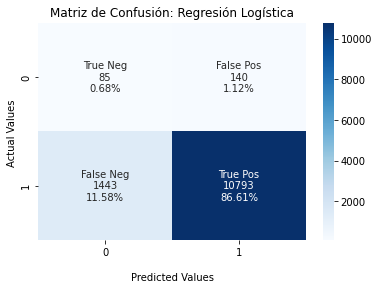

In [37]:
logreg_cf_matrix = confusion_matrix(y_test, logistic_regression_y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
logreg_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
logreg_cf_matrix.flatten()/np.sum(logreg_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(logreg_cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Matriz de Confusión: Regresión Logística');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

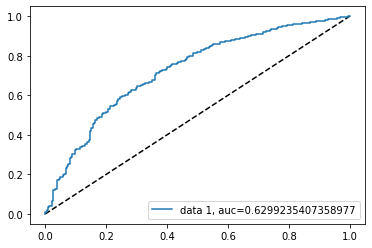

In [38]:
logistic_regression_y_pred_prob = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  logistic_regression_y_pred_prob)
auc = metrics.roc_auc_score(y_test, logistic_regression_y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [39]:
log_metrics = ['Logistic Regresion (Test)', 
               metrics.accuracy_score(y_test, logistic_regression_y_pred), 
               metrics.precision_score(y_test, logistic_regression_y_pred), 
               metrics.recall_score(y_test, logistic_regression_y_pred), 
               metrics.f1_score(y_test, logistic_regression_y_pred), 
               metrics.roc_auc_score(y_test, logistic_regression_y_pred)]

algorithm_metrics = pd.DataFrame(data = log_metrics).T
algorithm_metrics.columns =['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F-Score', 'AUC']

In [40]:
logistic_regression_y_train_pred = logreg.predict(x_train.dropna())

log_train_metrics = ['Logistic Regresion (Train)', 
               metrics.accuracy_score(y_train, logistic_regression_y_train_pred), 
               metrics.precision_score(y_train, logistic_regression_y_train_pred), 
               metrics.recall_score(y_train, logistic_regression_y_train_pred), 
               metrics.f1_score(y_train, logistic_regression_y_train_pred), 
               metrics.roc_auc_score(y_train, logistic_regression_y_train_pred)]


algorithm_metrics.loc[len(algorithm_metrics)] = log_train_metrics


## *5.2 Árbol de decisión simple*

best mean cross-validation score: 0.986
best parameters: {'max_depth': 34}


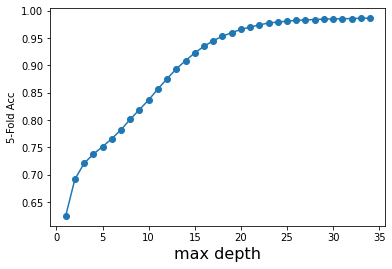

In [41]:
maxDepth = range(1,35) 
param_grid = {'max_depth': maxDepth } 

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(x_train_bal, y_train_bal)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [42]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, splitter = 'best', random_state=1)
dt_classifier.fit(x_train_bal, y_train_bal)
decision_tree_y_pred = dt_classifier.predict(x_test.dropna())

[[ 144   81]
 [2284 9952]]


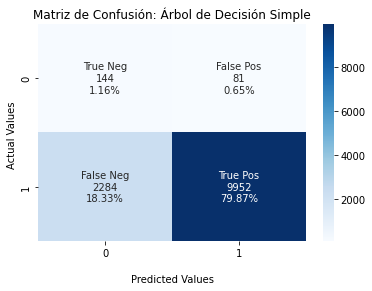

In [43]:
dt_cf_matrix = confusion_matrix(y_test, decision_tree_y_pred)
print(dt_cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
dt_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
dt_cf_matrix.flatten()/np.sum(dt_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(dt_cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Matriz de Confusión: Árbol de Decisión Simple');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

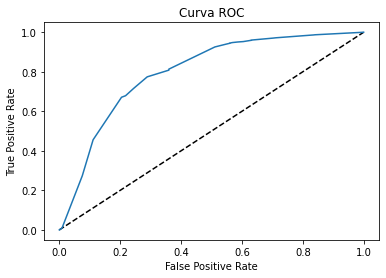

In [44]:
decision_tree_y_pred_prob = dt_classifier.predict_proba(x_test.dropna())[:,1]
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

In [45]:
decision_tree_metrics = ['Simple Decision Tree (Test)', 
               metrics.accuracy_score(y_train, logistic_regression_y_train_pred), 
               metrics.precision_score(y_train, logistic_regression_y_train_pred), 
               metrics.recall_score(y_train, logistic_regression_y_train_pred), 
               metrics.f1_score(y_train, logistic_regression_y_train_pred), 
               metrics.roc_auc_score(y_train, logistic_regression_y_train_pred)]

decision_tree_y_train_pred = dt_classifier.predict(x_train.dropna())

decision_tree_train_metrics = ['Simple Decision Tree (Train)', 
               metrics.accuracy_score(y_train, decision_tree_y_train_pred), 
               metrics.precision_score(y_train, decision_tree_y_train_pred), 
               metrics.recall_score(y_train, decision_tree_y_train_pred), 
               metrics.f1_score(y_train, decision_tree_y_train_pred), 
               metrics.roc_auc_score(y_train, decision_tree_y_train_pred)]


algorithm_metrics.loc[len(algorithm_metrics)] = decision_tree_metrics
algorithm_metrics.loc[len(algorithm_metrics)] = decision_tree_train_metrics


##*5.3 Random Forest*

In [46]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [10, 30, 150],
                 'max_features': [11, 19],
                 'max_depth'   : [5, 10],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(x_train_bal, y_train_bal)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 11, 'n_estimators': 10} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 11, 'n_estimators': 30} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 11, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 19, 'n_estimators': 10} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 19, 'n_estimators': 30} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 19, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 11, 'n_estimators': 10} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 11, 'n_estimators': 30} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 11, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 19, 'n_estimators': 10} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 19, 'n_estimators': 30} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 19, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 11, 'n_estimators': 10} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 11, 'n_estimators': 30} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 11, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 19, 'n_estimators': 10} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 19, 'n_estimators': 30} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 19, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 11, 'n_estimators': 10} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 11, 'n_estimators': 30} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 11, 'n_estimators': 150} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 19, 'n_estimators': 10} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 19, 'n_estimators': 30} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 19, 'n_estimators': 150} ✓


,oob_accuracy,criterion,max_depth,max_features,n_estimators
8,0.890466,gini,10,11,150
7,0.888343,gini,10,11,30
20,0.874820,entropy,10,11,150
11,0.874640,gini,10,19,150


Hemos cogido los parámetros indicados en la tabla anterior, a excepción de la profundidad, que hemos comprobado manualmente, que cogiendo una profundidad máxima de 5, obtenemos menor sobreajuste que con la profundidad que nos indica la tabla.

In [47]:
rf_classifier = RandomForestClassifier(max_depth=5, n_estimators=150, max_features=11, criterion='gini')
rf_classifier.fit(x_train_bal, y_train_bal)

random_forest_y_pred = rf_classifier.predict(x_test.dropna())

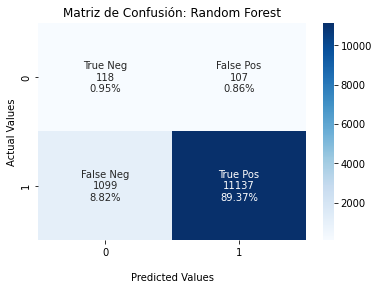

In [48]:
rf_cf_matrix = confusion_matrix(y_test, random_forest_y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
rf_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
rf_cf_matrix.flatten()/np.sum(rf_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(rf_cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Matriz de Confusión: Random Forest');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

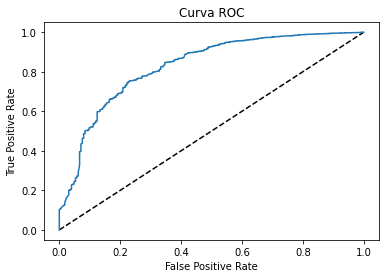

In [49]:
rf_y_pred_prob = rf_classifier.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()


In [50]:
random_forest_y_train_pred = rf_classifier.predict(x_train.dropna())

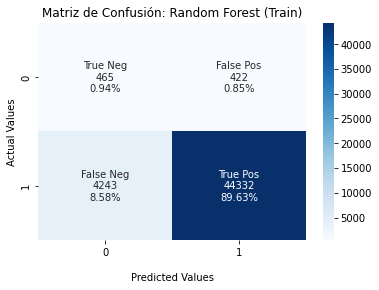

In [51]:
rf_train_cf_matrix = confusion_matrix(y_train, random_forest_y_train_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
rf_train_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
rf_train_cf_matrix.flatten()/np.sum(rf_train_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(rf_train_cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Matriz de Confusión: Random Forest (Train)');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [52]:
rf_metrics = ['Random Forest (Test)', 
               metrics.accuracy_score(y_test, random_forest_y_pred), 
               metrics.precision_score(y_test, random_forest_y_pred), 
               metrics.recall_score(y_test, random_forest_y_pred), 
               metrics.f1_score(y_test, random_forest_y_pred), 
               metrics.roc_auc_score(y_test, random_forest_y_pred)]

algorithm_metrics.loc[len(algorithm_metrics)] = rf_metrics

rf_train_metrics = ['Random Forest (Train)', 
               metrics.accuracy_score(y_train, random_forest_y_train_pred), 
               metrics.precision_score(y_train, random_forest_y_train_pred), 
               metrics.recall_score(y_train, random_forest_y_train_pred), 
               metrics.f1_score(y_train, random_forest_y_train_pred), 
               metrics.roc_auc_score(y_train, random_forest_y_train_pred)]

algorithm_metrics.loc[len(algorithm_metrics)] = rf_train_metrics

##*5.4 Resultados de cada algoritmo*

In [53]:
algorithm_metrics

,Algorithm,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regresion (Test),0.872964,0.987195,0.882069,0.931676,0.629924
1,Logistic Regresion (Train),0.871194,0.986266,0.881112,0.930728,0.604592
2,Simple Decision Tree (Test),0.871194,0.986266,0.881112,0.930728,0.604592
3,Simple Decision Tree (Train),0.819195,0.991907,0.822604,0.899357,0.727537
4,Random Forest (Test),0.903218,0.990484,0.910183,0.948637,0.717314
5,Random Forest (Train),0.905685,0.990571,0.912651,0.950016,0.718445


Para este problema de clasificación, podemos decir que el algoritmo de regresión logística empleado, da muy buenos resultados, arrojando resultados similares en train y test, con un área bajo la curva ROC que nos muestra que no hay sobreajuste en el modelo.

No podemos decir lo mismo en el árbol de decisión, ya que la diferencia en el área bajo la curva nos muestra que el algoritmo se encuentra sobreajustado para los datos de entrenamiento.

Por último, podemos ver que el algoritmo random forest, es el mejor clasificador de los que se han empleado. No presenta sobreajuste, con un recall del 91% en ambos conjuntos, superior a los demás algoritmos, y con un área debajo de la curva muy similar tanto en train como en test, del 71%.

#**6. Aplicación de algoritmos: Clasificación de lesiones**

Para clasificar los accidentes en función de si los pasajeros requerirán tratamiento médico o no, seguiremos el mismo procedimiento que hemos seguido para resolver el problema anterior. La diferencia respecto al anterior problema es que la variable objetivo será diferente. 

En este caso, la variable que queremos predecir, será "passenger_fatality", que nos indica si el pasajero ha sufrido lesiones, si ha fallecido, o si no ha sufrido ninguna de las dos. Vamos a eliminar la variable "fatality", que ha sido la variable objetivo del problema anterior, y vamos a eliminar los registros en los que existen fallecimientos. Aplicaremos prácticamente las mismas transformaciones de variables que en el dataset usado para el problema anterior.

Al igual que en el problema anterior, crearemos una muestra, la dividiremos en conjuntos de train y test, y aplicaremos los algoritmos de clasificación, que irán acompañados de la matriz de confusión, la curva ROC, y el resto de métricas.

## *6.1 Transformaciones iniciales*

In [54]:
df_passenger_medical = df.drop_duplicates().drop(['passenger_id','vehicle_id','fatality'], axis=1)

#Reemplazamos las Us, Xs y Ns por NAS.
df_passenger_medical = df_passenger_medical.replace({"U": np.nan, "UU": np.nan, "UUUU": np.nan, "X": np.nan, "XX": np.nan, "XXXX": np.nan, "N": np.nan, "NN": np.nan, "NNNN": np.nan})
#Reemplazamos las Qs por ceros.
df_passenger_medical = df_passenger_medical.replace({"Q": 0, "QQ": 0, "QQQQ": 0})


In [55]:
df_passenger_medical.passenger_fatality.replace({'2':1, '1':0, '3':2}, inplace=True)

df_passenger_medical_count = pd.DataFrame(df_passenger_medical.groupby(['passenger_fatality'])['passenger_fatality'].count().rename('Count'))
df_passenger_medical_count['Percentage'] = df_passenger_medical_count['Count']/df_passenger_medical_count['Count'].sum()
df_passenger_medical_count = df_passenger_medical_count.sort_values(by = "Count", ascending=False).reset_index()
df_passenger_medical_count

,passenger_fatality,Count,Percentage
0,1.0,3070875,0.559966
1,0.0,2372821,0.432677
2,2.0,40347,0.007357


In [56]:
df_passenger_medical.drop(df_passenger_medical.index[df_passenger_medical['passenger_fatality'] == 2.0], inplace=True)

df_passenger_medical.passenger_sex.replace({"M":1, "F":0}, inplace=True)

for column in df_passenger_medical.columns:
  df_passenger_medical[column] = pd.to_numeric(df_passenger_medical[column], errors = 'ignore', downcast= 'integer')

Hasta aquí, hemos tranasformado las variables necesarias, al igual que hemos hecho anteriormente. Además, hemos excluido los casos en los que en la variable objetivo hay fallecimientos, ya que no queremos clasificar en función de esos casos. 

La variable objetivo ha sido transformada de manera que toma el valor 0 si no hay lesión del pasajero, y el valor 1 si hay lesión.


Ahora creamos la muestra, y viendo que las proporciones están relativamente equilibradas, concluimos que no hace falta llevar a cabo un oversampling para la aplicación de algoritmos. Dividimos en train y test, y aplicamos los algoritmos de clasificación.

## *6.2 Creación de la muestra y dividisón en train y test*

In [57]:
df_sample_2 = df_passenger_medical.dropna().sample(n=100000)

df_sample_medical = pd.DataFrame(df_sample_2.groupby(['passenger_fatality'])['passenger_fatality'].count().rename('Count'))
df_sample_medical['Percentage'] = df_sample_medical['Count']/df_sample_medical['Count'].sum()
df_sample_medical = df_sample_medical.sort_values(by = "Count", ascending=False).reset_index()
df_sample_medical

,passenger_fatality,Count,Percentage
0,1.0,57189,0.57189
1,0.0,42811,0.42811


In [58]:
for column in df_sample_2.columns:
  df_sample_2[column] = pd.to_numeric(df_sample_2[column], errors = 'ignore', downcast= 'integer')

In [59]:
from sklearn.model_selection import train_test_split

train_2, test_2 = train_test_split(df_sample_2, test_size=0.2, stratify = df_sample_2['passenger_fatality'])

x_train_2 = train_2.dropna().drop('passenger_fatality', axis = 1)
y_train_2 = train_2.dropna()['passenger_fatality']
x_test_2 = test_2.dropna().drop('passenger_fatality', axis = 1)
y_test_2 = test_2.dropna()['passenger_fatality']

In [60]:
x_train_2['vehicle_age'] = x_train_2['year'] - x_train_2['vehicle_year'] 
x_test_2['vehicle_age'] = x_test_2['year'] - x_test_2['vehicle_year'] 

## *6.3 Regresión logística*

In [61]:
logreg = LogisticRegression()
logreg.fit(x_train_2, y_train_2)
logistic_regression_y_pred_2 = logreg.predict(x_test_2.dropna())

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/usr/local/lib/pytho

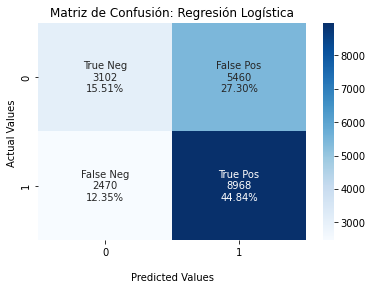

In [62]:
logreg_cf_matrix = confusion_matrix(y_test_2, logistic_regression_y_pred_2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
logreg_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
logreg_cf_matrix.flatten()/np.sum(logreg_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(logreg_cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Matriz de Confusión: Regresión Logística');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

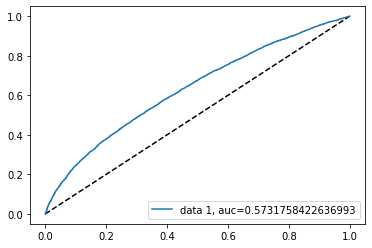

In [63]:
logistic_regression_y_pred_prob_2 = logreg.predict_proba(x_test_2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_2,  logistic_regression_y_pred_prob_2)
auc = metrics.roc_auc_score(y_test_2, logistic_regression_y_pred_2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [64]:
log_metrics_2 = ['Logistic Regresion (Test)', 
               metrics.accuracy_score(y_test_2, logistic_regression_y_pred_2), 
               metrics.precision_score(y_test_2, logistic_regression_y_pred_2), 
               metrics.recall_score(y_test_2, logistic_regression_y_pred_2), 
               metrics.f1_score(y_test_2, logistic_regression_y_pred_2), 
               metrics.roc_auc_score(y_test_2, logistic_regression_y_pred_2)]

algorithm_metrics_2 = pd.DataFrame(data = log_metrics_2).T
algorithm_metrics_2.columns =['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F-Score', 'AUC']

In [65]:
logistic_regression_y_train_pred_2 = logreg.predict(x_train_2.dropna())

log_train_metrics_2 = ['Logistic Regresion (Train)', 
               metrics.accuracy_score(y_train_2, logistic_regression_y_train_pred_2), 
               metrics.precision_score(y_train_2, logistic_regression_y_train_pred_2), 
               metrics.recall_score(y_train_2, logistic_regression_y_train_pred_2), 
               metrics.f1_score(y_train_2, logistic_regression_y_train_pred_2), 
               metrics.roc_auc_score(y_train_2, logistic_regression_y_train_pred_2)]


algorithm_metrics_2.loc[len(algorithm_metrics_2)] = log_train_metrics_2


## *6.4 Árbol de decisión simple*

best mean cross-validation score: 0.646
best parameters: {'max_depth': 9}


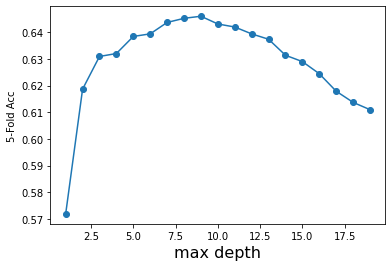

In [66]:
maxDepth = range(1,20) 
param_grid = {'max_depth': maxDepth } 

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(x_train_2, y_train_2)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold Acc')
plt.show()

In [67]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter = 'best', random_state=1)
dt_classifier.fit(x_train_2, y_train_2)
decision_tree_y_pred_2 = dt_classifier.predict(x_test_2.dropna())

[[5205 3357]
 [3667 7771]]


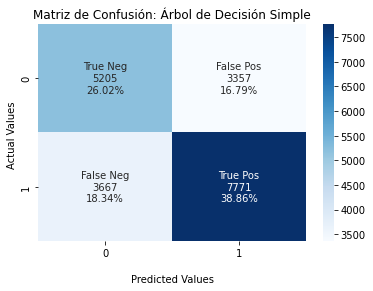

In [68]:
dt_cf_matrix = confusion_matrix(y_test_2, decision_tree_y_pred_2)
print(dt_cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
dt_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
dt_cf_matrix.flatten()/np.sum(dt_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(dt_cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Matriz de Confusión: Árbol de Decisión Simple');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

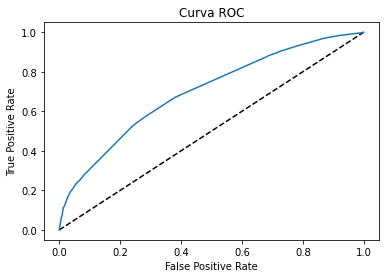

In [69]:
decision_tree_y_pred_prob_2 = dt_classifier.predict_proba(x_test_2.dropna())[:,1]
fpr, tpr, thresholds = roc_curve(y_test_2, decision_tree_y_pred_prob_2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()

In [70]:
decision_tree_metrics_2 = ['Simple Decision Tree (Test)', 
               metrics.accuracy_score(y_train_2, logistic_regression_y_train_pred_2), 
               metrics.precision_score(y_train_2, logistic_regression_y_train_pred_2), 
               metrics.recall_score(y_train_2, logistic_regression_y_train_pred_2), 
               metrics.f1_score(y_train_2, logistic_regression_y_train_pred_2), 
               metrics.roc_auc_score(y_train_2, logistic_regression_y_train_pred_2)]

decision_tree_y_train_pred_2 = dt_classifier.predict(x_train_2.dropna())

decision_tree_train_metrics_2 = ['Simple Decision Tree (Train)', 
               metrics.accuracy_score(y_train_2, decision_tree_y_train_pred_2), 
               metrics.precision_score(y_train_2, decision_tree_y_train_pred_2), 
               metrics.recall_score(y_train_2, decision_tree_y_train_pred_2), 
               metrics.f1_score(y_train_2, decision_tree_y_train_pred_2), 
               metrics.roc_auc_score(y_train_2, decision_tree_y_train_pred_2)]


algorithm_metrics_2.loc[len(algorithm_metrics_2)] = decision_tree_metrics_2
algorithm_metrics_2.loc[len(algorithm_metrics_2)] = decision_tree_train_metrics_2


##*6.5 Random Forest*

In [71]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [10, 30, 100],
                 'max_features': [11, 19],
                 'max_depth'   : [5, 10],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(x_train_2, y_train_2)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 11, 'n_estimators': 10} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 11, 'n_estimators': 30} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 11, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 19, 'n_estimators': 10} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 19, 'n_estimators': 30} ✓
Modelo: {'criterion': 'gini', 'max_depth': 5, 'max_features': 19, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 11, 'n_estimators': 10} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 11, 'n_estimators': 30} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 11, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 19, 'n_estimators': 10} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 19, 'n_estimators': 30} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 19, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 11, 'n_estimators': 10} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 11, 'n_estimators': 30} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 11, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 19, 'n_estimators': 10} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 19, 'n_estimators': 30} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 19, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 11, 'n_estimators': 10} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 11, 'n_estimators': 30} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 11, 'n_estimators': 100} ✓


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 19, 'n_estimators': 10} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 19, 'n_estimators': 30} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 19, 'n_estimators': 100} ✓


,oob_accuracy,criterion,max_depth,max_features,n_estimators
8,0.656325,gini,10,11,100
20,0.655963,entropy,10,11,100
19,0.655200,entropy,10,11,30
11,0.654837,gini,10,19,100


In [72]:
rf_classifier = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=11, criterion='gini')
rf_classifier.fit(x_train_2, y_train_2)

random_forest_y_pred_2 = rf_classifier.predict(x_test_2.dropna())

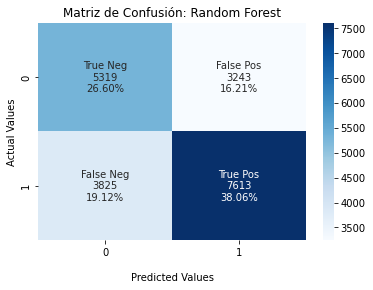

In [73]:
rf_cf_matrix = confusion_matrix(y_test_2, random_forest_y_pred_2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
rf_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
rf_cf_matrix.flatten()/np.sum(rf_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(rf_cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Matriz de Confusión: Random Forest');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

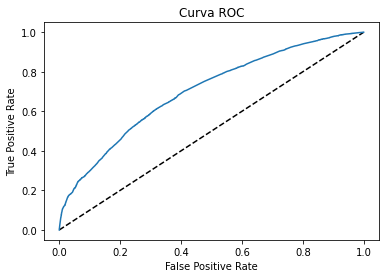

In [74]:
rf_y_pred_prob_2 = rf_classifier.predict_proba(x_test_2)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_2, rf_y_pred_prob_2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()


In [75]:
random_forest_y_train_pred_2 = rf_classifier.predict(x_train_2.dropna())

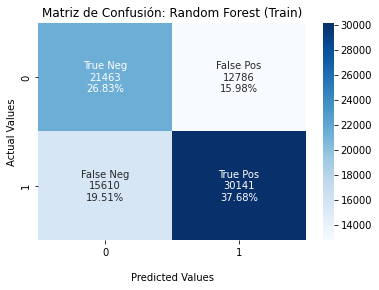

In [76]:
rf_train_cf_matrix = confusion_matrix(y_train_2, random_forest_y_train_pred_2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
rf_train_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
rf_train_cf_matrix.flatten()/np.sum(rf_train_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(rf_train_cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Matriz de Confusión: Random Forest (Train)');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [77]:
rf_metrics_2 = ['Random Forest (Test)', 
               metrics.accuracy_score(y_test_2, random_forest_y_pred_2), 
               metrics.precision_score(y_test_2, random_forest_y_pred_2), 
               metrics.recall_score(y_test_2, random_forest_y_pred_2), 
               metrics.f1_score(y_test_2, random_forest_y_pred_2), 
               metrics.roc_auc_score(y_test_2, random_forest_y_pred_2)]

algorithm_metrics_2.loc[len(algorithm_metrics_2)] = rf_metrics_2

rf_train_metrics_2 = ['Random Forest (Train)', 
               metrics.accuracy_score(y_train_2, random_forest_y_train_pred_2), 
               metrics.precision_score(y_train_2, random_forest_y_train_pred_2), 
               metrics.recall_score(y_train_2, random_forest_y_train_pred_2), 
               metrics.f1_score(y_train_2, random_forest_y_train_pred_2), 
               metrics.roc_auc_score(y_train_2, random_forest_y_train_pred_2)]

algorithm_metrics_2.loc[len(algorithm_metrics_2)] = rf_train_metrics_2

##*6.6 Resultados de cada algoritmo*

In [78]:
algorithm_metrics_2

,Algorithm,Accuracy,Precision,Recall,F-Score,AUC
0,Logistic Regresion (Test),0.6035,0.621569,0.784053,0.69342,0.573176
1,Logistic Regresion (Train),0.601712,0.619972,0.784333,0.692534,0.571047
2,Simple Decision Tree (Test),0.601712,0.619972,0.784333,0.692534,0.571047
3,Simple Decision Tree (Train),0.651663,0.701796,0.679723,0.690583,0.646951
4,Random Forest (Test),0.6466,0.701271,0.665588,0.682964,0.643411
5,Random Forest (Train),0.64505,0.702146,0.658805,0.679785,0.64274


Viendo el rendimiento de los tres algoritmos empleados para este problema de clasificación, podemos comprobar que obtenemos peores métricas que en el problema anterior.

Esto se puede deber a que las características de los accidentes en los que no existen muertes, son muy similares, dificultando la capacidad del algoritmo para distinguir si existirán lesiones en los pasajeros o no.

Al igual que en el problema anterior, el algoritmo random forest, es el que mejores métricas muestra, y menos sobreajuste obtiene.

In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Colab Notebooks/Práctica Final - Machine Learning: Modelos Supervisados.ipynb